In [1]:
import os
import pandas as pd
import zipfile
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
curdir = os.getcwd()
datadir = os.path.join(curdir, 'DATA/')

proj_type = 'Stream_Temperature_Projections_'
timeframe = '1950-2099_'

outdir = os.path.join(datadir, 'Outputs/gcms/')
tempdir = os.path.join(datadir, 'preds_GCM/')

In [142]:
# USER INPUTS
curhuc = '1706020114' #huc10
h10name = 'Bayhorse_Creek-Salmon_River'
state = 'ID'

In [143]:
huc8 = curhuc[:8]

proj_name = proj_type + timeframe + h10name
proj_path = os.path.join(outdir, huc8[:6], proj_name)

db_path = os.path.join(proj_path, 'daily_covariates.db.zip')
db_temp = os.path.join(proj_path, 'daily_stream_temperature.db.zip')

In [134]:
db_path[:-4]

'/Volumes/Elements/URycki/Repos/temp-data/DATA/Outputs/gcms/170602/Stream_Temperature_Projections_1950-2099_Bayhorse_Creek-Salmon_River/daily_covariates.db'

In [135]:
metadata_file = os.path.join(tempdir, 'metadata.csv')
model_meta = pd.read_csv(metadata_file, skipfooter=5)
model_meta

/var/folders/95/99dy_ns968195cnlvp5xhwqm0000gp/T/ipykernel_28068/1193658664.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  model_meta = pd.read_csv(metadata_file, skipfooter=5)


,Global Climate Model short name,GCM long name,GCM code,Country,Agency,Coupled Model Intercomparison Project version,Emissions scenario,Downscaling method,Hydrology model,Network routing
0,CanESM2,Canadian Earth System Model version 2,1,Canada,Canadian Centre for Climate Modeling and Analysis,5,RCP 8.5,Multivariate Adaptive Constructed Analogs (Aba...,"Variable Infiltration Capacity, using paramete...",mizuRoute (Mizukami 2019)
1,CCSM4,Community Climate System Model version 4,2,USA,"National Center of Atmospheric Research, USA",5,RCP 8.5,Multivariate Adaptive Constructed Analogs (Aba...,"Variable Infiltration Capacity, using paramete...",mizuRoute (Mizukami 2019)
2,CNRM-CM5,National Center for Meteorological Research Mo...,3,France,"National Centre of Meteorological Research, Fr...",5,RCP 8.5,Multivariate Adaptive Constructed Analogs (Aba...,"Variable Infiltration Capacity, using paramete...",mizuRoute (Mizukami 2019)
3,CSIRO-Mk3-6-0,Commonwealth Scientific and Industrial Researc...,4,Australia,Commonwealth Scientific and Industrial Researc...,5,RCP 8.5,Multivariate Adaptive Constructed Analogs (Aba...,"Variable Infiltration Capacity, using paramete...",mizuRoute (Mizukami 2019)
4,GDFL-ESM2M,Global Fluid Dynamics Lab's Earth Systems Mode...,5,USA,"NOAA Geophysical Fluid Dynamics Laboratory, USA",5,RCP 8.5,Multivariate Adaptive Constructed Analogs (Aba...,"Variable Infiltration Capacity, using paramete...",mizuRoute (Mizukami 2019)
5,HadGEM-CC365,"Hadley Centre Global Environmental Model, Clim...",6,UK,"Met Office Hadley Center, UK",5,RCP 8.5,Multivariate Adaptive Constructed Analogs (Aba...,"Variable Infiltration Capacity, using paramete...",mizuRoute (Mizukami 2019)
6,HadGEM2-ES,"Hadley Centre Global Environmental Model, Eart...",7,UK,"Met Office Hadley Center, UK",5,RCP 8.5,Multivariate Adaptive Constructed Analogs (Aba...,"Variable Infiltration Capacity, using paramete...",mizuRoute (Mizukami 2019)
7,inmcm4,"Institute of Numerical Mathematics, Coupled Mo...",8,Russia,"Institute of Numerical Mathematics, Russia",5,RCP 8.5,Multivariate Adaptive Constructed Analogs (Aba...,"Variable Infiltration Capacity, using paramete...",mizuRoute (Mizukami 2019)
8,IPSL-CM5A-MR,Institut Pierre Simon Laplace Climate Model,9,France,"Institut Pierre Simon Laplace, France",5,RCP 8.5,Multivariate Adaptive Constructed Analogs (Aba...,"Variable Infiltration Capacity, using paramete...",mizuRoute (Mizukami 2019)
9,MIROC5,Model for Interdisciplinary Research on Climat...,10,Japan,Atmosphere and Ocean Research Institute (The U...,5,RCP 8.5,Multivariate Adaptive Constructed Analogs (Aba...,"Variable Infiltration Capacity, using paramete...",mizuRoute (Mizukami 2019)


In [136]:
code_dict = {str(row["GCM code"]):row["Global Climate Model short name"] for i, row in model_meta.iterrows()}
code_dict['mean'] = 'mean'
code_dict

{'1': 'CanESM2',
 '2': 'CCSM4',
 '3': 'CNRM-CM5',
 '4': 'CSIRO-Mk3-6-0',
 '5': 'GDFL-ESM2M',
 '6': 'HadGEM-CC365',
 '7': 'HadGEM2-ES',
 '8': 'inmcm4',
 '9': 'IPSL-CM5A-MR',
 '10': 'MIROC5',
 'mean': 'mean'}

In [ ]:
with zipfile.ZipFile(db_path, 'r') as zip_ref:
    # Extract all contents to the specified directory
    zip_ref.extractall(proj_path)

In [ ]:
with zipfile.ZipFile(db_temp, 'r') as zip_ref:
    # Extract all contents to the specified directory
    zip_ref.extractall(proj_path)

In [8]:
import xarray as xr

In [144]:
curhuc

'1706020114'

In [145]:
# Spring stream temp
ds = xr.open_dataset(os.path.join(tempdir, 'predictions_temperature', f'{curhuc}.nc'))
streamtemp_df = ds[['COMID', 'date', 'GCM', 'prd.stream_temp']].to_dataframe()
streamtemp_df.reset_index(inplace=True)

streamtemp = streamtemp_df.query('80 <= date.dt.dayofyear <= 171 and (2020 <= date.dt.year < 2030 or 2040 <= date.dt.year < 2050 or 2080 <= date.dt.year < 2090)')

In [146]:
streamtemp.columns

Index(['COMID', 'date', 'GCM', 'prd.stream_temp'], dtype='object')

In [147]:
streamtemp

,COMID,date,GCM,prd.stream_temp
256460,23478479,2020-03-20,1,3.698456
256461,23478479,2020-03-20,2,2.624384
256462,23478479,2020-03-20,3,3.831269
256463,23478479,2020-03-20,4,5.140665
256464,23478479,2020-03-20,5,1.028964
...,...,...,...,...
13658285,23484475,2089-06-20,6,13.869792
13658286,23484475,2089-06-20,7,13.350462
13658287,23484475,2089-06-20,8,9.069064
13658288,23484475,2089-06-20,9,11.911100


In [148]:
streamtempds = xr.Dataset.from_dataframe(streamtemp.set_index(['date', 'COMID', 'GCM']))

ens_mean = streamtempds.mean(dim='GCM')
ens_mean = ens_mean.assign_coords(GCM='mean')
streamtempds_comb = xr.concat([streamtempds, ens_mean], dim = 'GCM')


streamtemp = streamtempds_comb[['COMID','date', 'GCM', *ens_mean.data_vars]].to_dataframe().reset_index()
streamtemp

,COMID,date,GCM,prd.stream_temp
0,23478479,2020-03-20,1,3.698456
1,23478479,2020-03-20,2,2.624384
2,23478479,2020-03-20,3,3.831269
3,23478479,2020-03-20,4,5.140665
4,23478479,2020-03-20,5,1.028964
...,...,...,...,...
758995,23484475,2089-06-20,7,13.350462
758996,23484475,2089-06-20,8,9.069064
758997,23484475,2089-06-20,9,11.911100
758998,23484475,2089-06-20,10,11.602591


In [150]:
%%time
# Summer air temp

# Example: Filter for ('col1' == 'value_A' AND 'col2' > 10) OR ('col3' == 'value_B')
# filters = [[('col1', '==', 'value_A'), ('col2', '>', 10)], [('col3', '==', 'value_B')]]
# strftime('%j', date) BETWEEN '264' AND '356' AND (strftime('%Y', date) BETWEEN '2020' AND '2029' OR strftime('%Y', date) BETWEEN '2040' AND '2049' OR strftime('%Y', date) BETWEEN '2080' AND '2089') ;", con_temp)

filters = [('tim.doy', '>=', 172), ('tim.doy', '<=', 263), ('tim.year', '>=', 2020), ('tim.year', '<', 2030)]#, [('col3', '==', 'value_B')]]
airtemp20s = pd.read_parquet(os.path.join(datadir, 'preds_GCM', 'predictions_covariates', 'parquets', f'{curhuc}_covs.parq'), columns = ['COMID', 'GCM', 'date', 'cov.air_temp_ws'], filters=filters)

filters = [('tim.doy', '>=', 172), ('tim.doy', '<=', 263), ('tim.year', '>=', 2040), ('tim.year', '<', 2050)]#, [('col3', '==', 'value_B')]]
airtemp40s = pd.read_parquet(os.path.join(datadir, 'preds_GCM', 'predictions_covariates','parquets', f'{curhuc}_covs.parq'), columns = ['COMID', 'GCM', 'date', 'cov.air_temp_ws'], filters=filters)

filters = [('tim.doy', '>=', 172), ('tim.doy', '<=', 263), ('tim.year', '>=', 2080), ('tim.year', '<', 2090)]#, [('col3', '==', 'value_B')]]
airtemp80s = pd.read_parquet(os.path.join(datadir, 'preds_GCM', 'predictions_covariates', 'parquets',f'{curhuc}_covs.parq'), columns = ['COMID', 'GCM', 'date', 'cov.air_temp_ws'], filters=filters)

airtemp = pd.concat([airtemp20s, airtemp40s, airtemp80s])

airtemp

CPU times: user 1.64 s, sys: 473 ms, total: 2.11 s
Wall time: 3.14 s


,COMID,GCM,date,cov.air_temp_ws
__null_dask_index__,,,,
767092,23479505,1,2020-06-20,14.380817
767093,23479505,1,2020-06-21,12.655534
767094,23479505,1,2020-06-22,13.689924
767095,23479505,1,2020-06-23,15.025829
767096,23479505,1,2020-06-24,14.326002
...,...,...,...,...
1533136,23484071,10,2089-09-20,10.191169
1533137,23484073,10,2089-09-20,10.191169
1533138,23484089,10,2089-09-20,10.191169


In [151]:
airtempds = xr.Dataset.from_dataframe(airtemp.set_index(['date', 'COMID', 'GCM']))

ens_mean = airtempds.mean(dim='GCM')
ens_mean = ens_mean.assign_coords(GCM='mean')
airtempds_comb = xr.concat([airtempds, ens_mean], dim = 'GCM')


airtemp = airtempds_comb[['COMID','date', 'GCM', *ens_mean.data_vars]].to_dataframe().reset_index()
airtemp

,COMID,date,GCM,cov.air_temp_ws
0,23478479,2020-06-20,1,14.380817
1,23478479,2020-06-20,2,8.762399
2,23478479,2020-06-20,3,11.658124
3,23478479,2020-06-20,4,14.166005
4,23478479,2020-06-20,5,14.441364
...,...,...,...,...
910795,23484475,2089-09-20,7,19.775242
910796,23484475,2089-09-20,8,9.777357
910797,23484475,2089-09-20,9,15.268183
910798,23484475,2089-09-20,10,10.191169


In [152]:
%%time

# Example: Filter for ('col1' == 'value_A' AND 'col2' > 10) OR ('col3' == 'value_B')
# filters = [[('col1', '==', 'value_A'), ('col2', '>', 10)], [('col3', '==', 'value_B')]]
# strftime('%j', date) BETWEEN '264' AND '356' AND (strftime('%Y', date) BETWEEN '2020' AND '2029' OR strftime('%Y', date) BETWEEN '2040' AND '2049' OR strftime('%Y', date) BETWEEN '2080' AND '2089') ;", con_temp)

# Spring flow

filters = [('tim.doy', '>=', 80), ('tim.doy', '<=', 171), ('tim.year', '>=', 2020), ('tim.year', '<', 2030)]#, [('col3', '==', 'value_B')]]
flowlog20s = pd.read_parquet(os.path.join(datadir, 'preds_GCM', 'predictions_covariates','parquets', f'{curhuc}_covs.parq'), columns = ['COMID', 'GCM', 'date', 'cov.Flow_log'], filters=filters)

filters = [('tim.doy', '>=', 80), ('tim.doy', '<=', 171), ('tim.year', '>=', 2040), ('tim.year', '<', 2050)]#, [('col3', '==', 'value_B')]]
flowlog40s = pd.read_parquet(os.path.join(datadir, 'preds_GCM', 'predictions_covariates','parquets', f'{curhuc}_covs.parq'), columns = ['COMID', 'GCM', 'date', 'cov.Flow_log'], filters=filters)

filters = [('tim.doy', '>=', 80), ('tim.doy', '<=', 171), ('tim.year', '>=', 2080), ('tim.year', '<', 2090)]#, [('col3', '==', 'value_B')]]
flowlog80s = pd.read_parquet(os.path.join(datadir, 'preds_GCM', 'predictions_covariates', 'parquets',f'{curhuc}_covs.parq'), columns = ['COMID', 'GCM', 'date', 'cov.Flow_log'], filters=filters)

flowlog = pd.concat([flowlog20s, flowlog40s, flowlog80s])

flowlog

CPU times: user 1.56 s, sys: 176 ms, total: 1.74 s
Wall time: 839 ms


,COMID,GCM,date,cov.Flow_log
__null_dask_index__,,,,
767013,23479505,1,2020-04-09,4.011310
767014,23479505,1,2020-04-10,4.222421
767015,23479505,1,2020-04-11,3.890535
767016,23479505,1,2020-04-12,3.193070
767017,23479505,1,2020-04-13,2.843965
...,...,...,...,...
1534046,23484071,10,2089-04-09,5.935348
1534047,23484073,10,2089-04-09,5.935348
1534048,23484089,10,2089-04-09,5.935348


In [153]:
flowlogds = xr.Dataset.from_dataframe(flowlog.set_index(['date', 'COMID', 'GCM']))

ens_mean = flowlogds.mean(dim='GCM')
ens_mean = ens_mean.assign_coords(GCM='mean')
flowlogds_comb = xr.concat([flowlogds, ens_mean], dim = 'GCM')


flowlog = flowlogds_comb[['COMID','date', 'GCM', *ens_mean.data_vars]].to_dataframe().reset_index()
flowlog

,COMID,date,GCM,cov.Flow_log
0,23478479,2020-03-20,1,2.228162
1,23478479,2020-03-20,2,1.638119
2,23478479,2020-03-20,3,2.524750
3,23478479,2020-03-20,4,2.781498
4,23478479,2020-03-20,5,1.463306
...,...,...,...,...
910795,23484475,2089-06-20,7,3.656072
910796,23484475,2089-06-20,8,4.780579
910797,23484475,2089-06-20,9,2.834252
910798,23484475,2089-06-20,10,3.531234


In [155]:
%%time

# Example: Filter for ('col1' == 'value_A' AND 'col2' > 10) OR ('col3' == 'value_B')
# filters = [[('col1', '==', 'value_A'), ('col2', '>', 10)], [('col3', '==', 'value_B')]]
# strftime('%j', date) BETWEEN '264' AND '356' AND (strftime('%Y', date) BETWEEN '2020' AND '2029' OR strftime('%Y', date) BETWEEN '2040' AND '2049' OR strftime('%Y', date) BETWEEN '2080' AND '2089') ;", con_temp)

# Winter SwS

filtersbeg = [('tim.year', '>=', 2019), ('tim.year', '<', 2030), ('tim.doy', '<=', 80)]
filtersend = [('tim.year', '>=', 2019), ('tim.year', '<', 2030),('tim.doy', '>=', 357)], #, [('col3', '==', 'value_B')]]
swe20sbeg = pd.read_parquet(os.path.join(datadir, 'preds_GCM', 'predictions_covariates', 'parquets',f'{curhuc}_covs.parq'), columns = ['COMID', 'GCM', 'date', 'cov.SWE'], filters=filtersbeg)
swe20send = pd.read_parquet(os.path.join(datadir, 'preds_GCM', 'predictions_covariates', 'parquets',f'{curhuc}_covs.parq'), columns = ['COMID', 'GCM', 'date', 'cov.SWE'], filters=filtersend)

CPU times: user 1.16 s, sys: 114 ms, total: 1.28 s
Wall time: 2.62 s


In [156]:
filtersbeg = [('tim.year', '>=', 2039), ('tim.year', '<', 2050), ('tim.doy', '<=', 80)]
filtersend = [('tim.year', '>=', 2039), ('tim.year', '<', 2050),('tim.doy', '>=', 357)], #, [('col3', '==', 'value_B')]]
swe40sbeg = pd.read_parquet(os.path.join(datadir, 'preds_GCM', 'predictions_covariates', 'parquets',f'{curhuc}_covs.parq'), columns = ['COMID', 'GCM', 'date', 'cov.SWE'], filters=filtersbeg)
swe50send = pd.read_parquet(os.path.join(datadir, 'preds_GCM', 'predictions_covariates','parquets', f'{curhuc}_covs.parq'), columns = ['COMID', 'GCM', 'date', 'cov.SWE'], filters=filtersend)

In [157]:
filtersbeg = [('tim.year', '>=', 2079), ('tim.year', '<', 2090), ('tim.doy', '<=', 80)]
filtersend = [('tim.year', '>=', 2079), ('tim.year', '<', 2090),('tim.doy', '>=', 357)], #, [('col3', '==', 'value_B')]]
swe80sbeg = pd.read_parquet(os.path.join(datadir, 'preds_GCM', 'predictions_covariates', 'parquets',f'{curhuc}_covs.parq'), columns = ['COMID', 'GCM', 'date', 'cov.SWE'], filters=filtersbeg)
swe80send = pd.read_parquet(os.path.join(datadir, 'preds_GCM', 'predictions_covariates', 'parquets',f'{curhuc}_covs.parq'), columns = ['COMID', 'GCM', 'date', 'cov.SWE'], filters=filtersend)

In [158]:
swe = pd.concat([swe20sbeg, swe20send, swe40sbeg, swe50send, swe80sbeg, swe80send])
swe

,COMID,GCM,date,cov.SWE
__null_dask_index__,,,,
756061,23479505,1,2019-01-01,34.415274
756062,23479505,1,2019-01-10,62.348381
756073,23479505,1,2019-01-11,62.548907
756084,23479505,1,2019-01-12,66.949622
756095,23479505,1,2019-01-13,82.015986
...,...,...,...,...
1533701,23484071,10,2089-12-31,41.301254
1533702,23484073,10,2089-12-31,41.301254
1533703,23484089,10,2089-12-31,41.301254


In [159]:
sweds = xr.Dataset.from_dataframe(swe.set_index(['date', 'COMID', 'GCM']))

ens_mean = sweds.mean(dim='GCM')
ens_mean = ens_mean.assign_coords(GCM='mean')
sweds_comb = xr.concat([sweds, ens_mean], dim = 'GCM')


swe = sweds_comb[['COMID','date', 'GCM', *ens_mean.data_vars]].to_dataframe().reset_index()
swe

,COMID,date,GCM,cov.SWE
0,23478479,2019-01-01,1,34.415274
1,23478479,2019-01-01,2,59.798907
2,23478479,2019-01-01,3,85.765848
3,23478479,2019-01-01,4,39.790395
4,23478479,2019-01-01,5,62.705953
...,...,...,...,...
972175,23484475,2089-12-31,7,54.034843
972176,23484475,2089-12-31,8,19.787370
972177,23484475,2089-12-31,9,28.737455
972178,23484475,2089-12-31,10,41.301254


In [160]:
swe.date.dt.year.unique()

array([2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029,
       2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049,
       2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089],
      dtype=int32)

In [161]:
swe['year'] = swe.date.apply(lambda x: x.year + 1 if x.month >=10 else x.year)
swe = swe[~swe.year.isin([2019, 2030, 2039, 2050, 2079, 2090])]


In [162]:
swe_cum = (swe.drop('date', axis = 1).groupby(['COMID', 'GCM', 'year'])['cov.SWE'].sum()/1000).reset_index()

In [163]:
swe_cum

,COMID,GCM,year,cov.SWE
0,23478479,1,2020,4.255315
1,23478479,1,2021,4.997769
2,23478479,1,2022,5.532554
3,23478479,1,2023,4.756439
4,23478479,1,2024,2.358774
...,...,...,...,...
9895,23484475,mean,2085,4.317444
9896,23484475,mean,2086,5.411518
9897,23484475,mean,2087,4.620217
9898,23484475,mean,2088,3.519912


In [ ]:
%%time

# Load in temperature from db
con_temp= sqlite3.connect(db_temp[:-4])
cursor_temp = con_temp.cursor()
cursor_temp.execute("SELECT name FROM sqlite_master WHERE type='table';")
#cursor_temp.execute("SELECT * FROM sqlite_master;")

tables_temp = cursor_temp.fetchall()
print(tables_temp)

#Fall
streamtemp = pd.read_sql_query(f"SELECT comid, GCM, strftime('%Y', date) AS year, stream_temp FROM stream_temperature WHERE strftime('%j', date) BETWEEN '264' AND '356' AND (strftime('%Y', date) BETWEEN '2020' AND '2029' OR strftime('%Y', date) BETWEEN '2040' AND '2049' OR strftime('%Y', date) BETWEEN '2080' AND '2089') ;", con_temp)
con_temp.close()

streamtemp

In [120]:
seasons = ['fall', 'winter', 'spring', 'summer']
anom_covs = ['air_temp_ws', 'Flow_log', 'SWE']

In [121]:
swe_cum.dtypes

COMID        int64
GCM         object
year         int64
cov.SWE    float64
dtype: object

In [164]:
for curdf in [swe_cum, airtemp, flowlog, streamtemp]:
    if 'year' in curdf.columns:
        curdf['epoch'] = curdf.year.apply(lambda x: str(x)[:3]+'0s')
    else:
        curdf['epoch'] = curdf.date.dt.year.apply(lambda x: str(x)[:3]+'0s')
    
    try: curdf['GCM'] = curdf.GCM.apply(lambda x: code_dict[str(x)])
    except: pass

In [165]:
curdf

,COMID,date,GCM,prd.stream_temp,epoch
0,23478479,2020-03-20,CanESM2,3.698456,2020s
1,23478479,2020-03-20,CCSM4,2.624384,2020s
2,23478479,2020-03-20,CNRM-CM5,3.831269,2020s
3,23478479,2020-03-20,CSIRO-Mk3-6-0,5.140665,2020s
4,23478479,2020-03-20,GDFL-ESM2M,1.028964,2020s
...,...,...,...,...,...
758995,23484475,2089-06-20,HadGEM2-ES,13.350462,2080s
758996,23484475,2089-06-20,inmcm4,9.069064,2080s
758997,23484475,2089-06-20,IPSL-CM5A-MR,11.911100,2080s
758998,23484475,2089-06-20,MIROC5,11.602591,2080s


In [166]:
curcomids = curdf.COMID.unique()
len(curcomids)

25

In [167]:
swe_cum


,COMID,GCM,year,cov.SWE,epoch
0,23478479,CanESM2,2020,4.255315,2020s
1,23478479,CanESM2,2021,4.997769,2020s
2,23478479,CanESM2,2022,5.532554,2020s
3,23478479,CanESM2,2023,4.756439,2020s
4,23478479,CanESM2,2024,2.358774,2020s
...,...,...,...,...,...
9895,23484475,mean,2085,4.317444,2080s
9896,23484475,mean,2086,5.411518,2080s
9897,23484475,mean,2087,4.620217,2080s
9898,23484475,mean,2088,3.519912,2080s


In [168]:
curcomid_df = curdf[curdf.COMID==curcomids[5]]

In [169]:
i=5

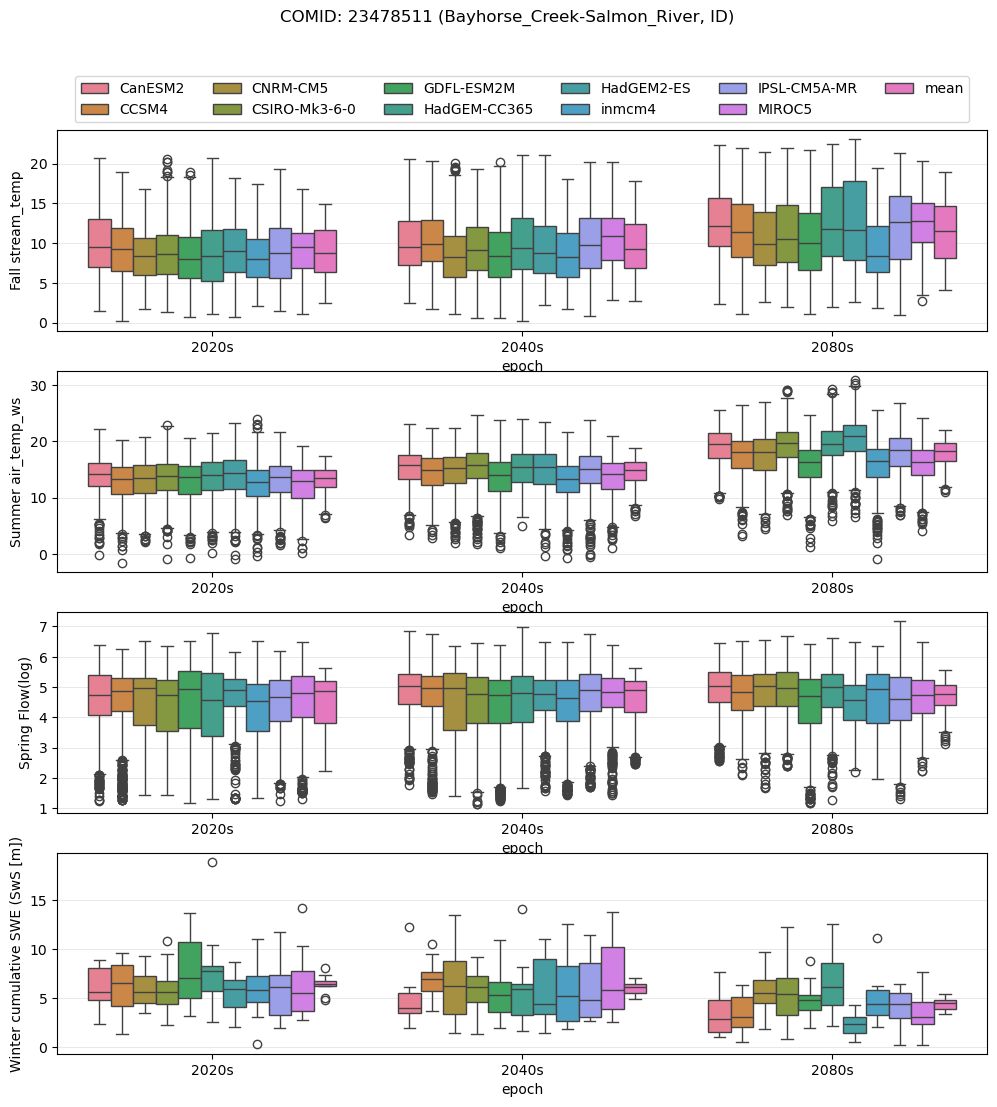

In [170]:

fig, ax = plt.subplots(4, 1, figsize = (12, 12))

sns.boxplot(ax = ax[0], data = streamtemp[streamtemp.COMID==curcomids[i]], x = 'epoch', y = 'prd.stream_temp', hue='GCM', fill=True)
ax[0].set_ylabel('Fall stream_temp')
ax[0].grid(axis='y', color='gray', linewidth=0.5, alpha = 0.25)
ax[0].legend(ncol=6, loc='upper center', bbox_to_anchor=(0.5, 1.3))

sns.boxplot(ax = ax[1], data = airtemp[airtemp.COMID==curcomids[i]], x = 'epoch', y = 'cov.air_temp_ws', hue='GCM', fill=True, legend = None)
ax[1].set_ylabel('Summer air_temp_ws')
ax[1].grid(axis='y', color='gray', linewidth=0.5, alpha = 0.25)
#ax0.set_title('Summer')
#ax0.set_xlabel('GCM')

sns.boxplot(ax = ax[2], data = flowlog[flowlog.COMID==curcomids[i]], x = 'epoch', y = 'cov.Flow_log', hue='GCM', fill=True, legend = None)
ax[2].set_ylabel('Spring Flow(log)')
ax[2].grid(axis='y', color='gray', linewidth=0.5, alpha = 0.25)

sns.boxplot(ax = ax[3], data = swe_cum[swe_cum.COMID==curcomids[i]], x = 'epoch', y = 'cov.SWE', hue='GCM', fill=True, legend = None)
ax[3].set_ylabel('Winter cumulative SWE (SwS [m])')
ax[3].grid(axis='y', color='gray', linewidth=0.5, alpha = 0.25)

plt.suptitle(f'COMID: {curcomids[i]} ({h10name}, {state})')
plt.savefig(os.path.join(outdir, f'{curhuc}_{curcomids[i]}_GCM_dist.png'))

In [42]:
import geopandas as gpd


In [62]:
table = gpd.read_file(db_path[:-4])

DataLayerError: Could not iterate over features: In GetNextRawFeature(): sqlite3_step() : database disk image is malformed

In [40]:
table

NameError: name 'table' is not defined

In [63]:
test = pd.read_sql_table('covariates', con)

NotImplementedError: 

In [82]:
flowlogds = xr.Dataset.from_dataframe(flowlog.set_index(['date', 'COMID', 'GCM']))

ens_mean = flowlogds.mean(dim='GCM')
ens_mean = ens_mean.assign_coords(GCM='mean')
flowlogds_comb = xr.concat([flowlogds, ens_mean], dim = 'GCM')


flowlog = flowlogds_comb[['COMID','date', 'GCM', *ens_mean.data_vars]].to_dataframe().reset_index()
flowlog

,COMID,date,GCM,cov.Flow_log
0,24422607,2020-03-20,1,3.310379
1,24422607,2020-03-20,2,3.212754
2,24422607,2020-03-20,3,3.554231
3,24422607,2020-03-20,4,4.330543
4,24422607,2020-03-20,5,3.369374
...,...,...,...,...
6679195,24425631,2089-06-20,7,3.388966
6679196,24425631,2089-06-20,8,4.173188
6679197,24425631,2089-06-20,9,3.439217
6679198,24425631,2089-06-20,10,4.335491
